**Q-2. Imagine you have a dataset where you have different features like Age , Gender , Height , Weight , BMI , and Blood Pressure and you have to classify the people into different classes like Normal , Overweight , Obesity , Underweight , and Extreme Obesity by using any 4 different classification algorithms. Now you have to build a model which can classify people into different classes. Dataset This is the Dataset You can use this dataset for this question.**

In [25]:
data = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [26]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [27]:
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [28]:
data.duplicated().sum()

24

In [31]:
data.drop_duplicates(inplace=True)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   object 
 1   Age                             2087 non-null   float64
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   object 
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   object 
 12  FAF                             20

In [40]:
# saprate numwerical and catigorical frature
categorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index([], dtype='object')
Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


<Axes: ylabel='NObeyesdad'>

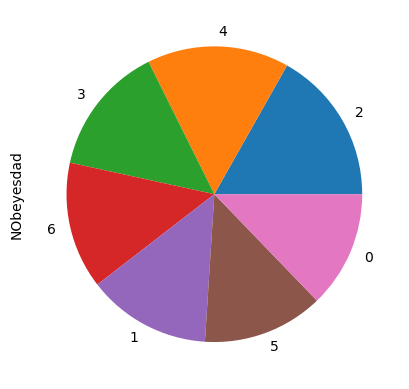

In [41]:
data['NObeyesdad'].value_counts().plot.pie()

In [42]:
# use label encoding on catigorical data
from sklearn.preprocessing import LabelEncoder
lable = LabelEncoder()

for i in categorical_features:
    data[i] = lable.fit_transform(data[i])

<Axes: >

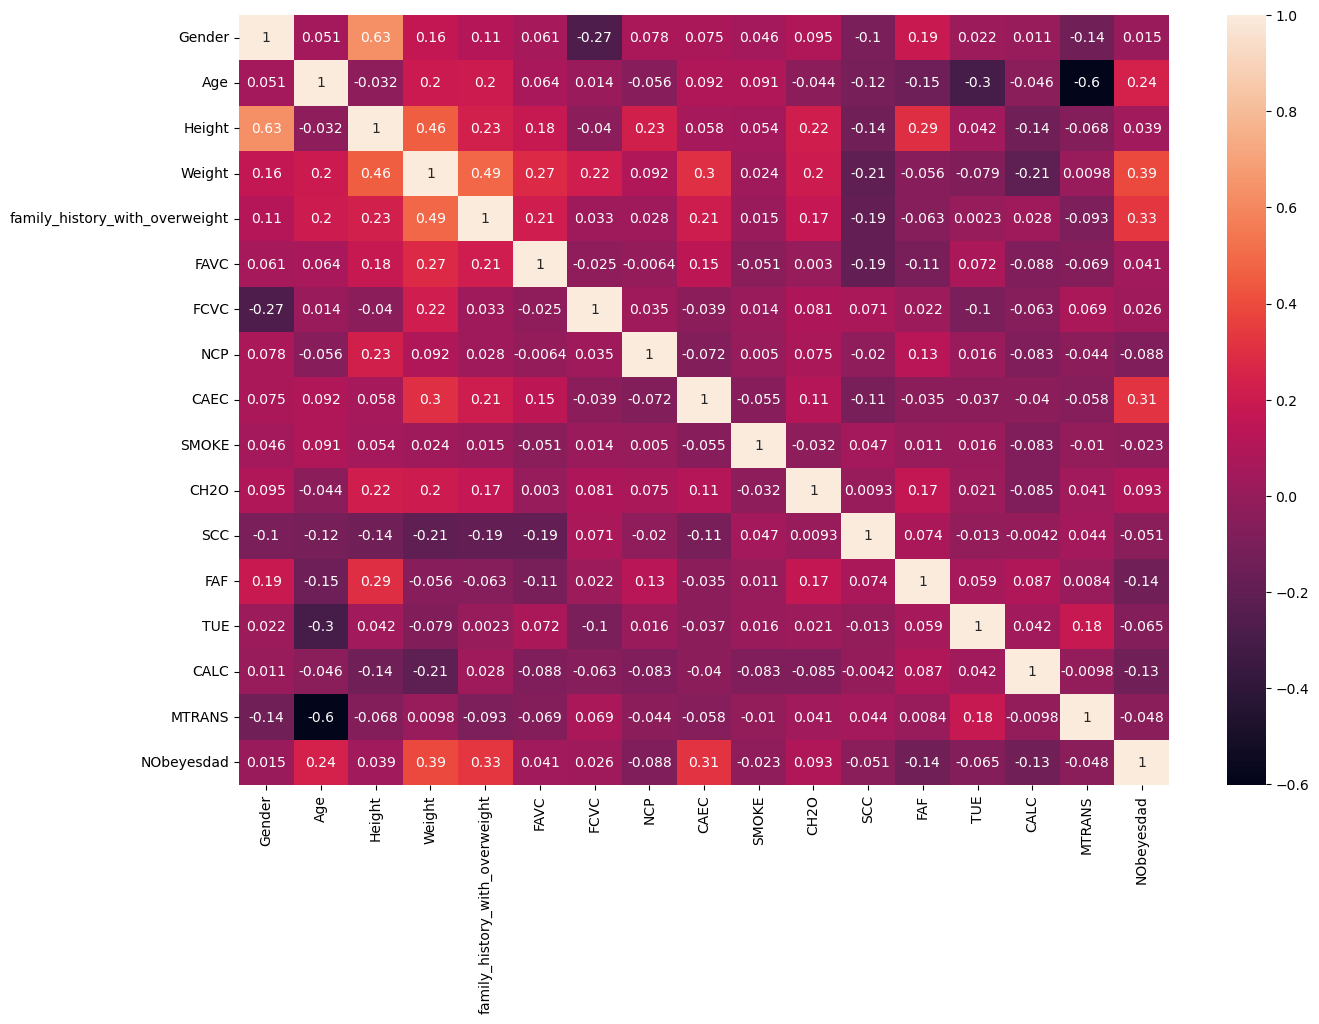

In [43]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

In [38]:
x = data.drop('NObeyesdad',axis=1)
y = data['NObeyesdad']

In [44]:
categorical_features = x.select_dtypes(include="object").columns
numerical_features = x.select_dtypes(exclude="object").columns
print(categorical_features)
print(numerical_features)

Index([], dtype='object')
Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS'],
      dtype='object')


In [45]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [46]:
## Numerical Pipline
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

cato_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("scaler",StandardScaler())
    ]
)

# Create Preprocessor object
preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_features),
    ("cato_pipline",cato_pipline,catigorical_features)
])

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [48]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [49]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [50]:
# Logastic regression
logestic = LogisticRegression(class_weight="balanced")
logestic.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

In [51]:
logestic.score(X_train,y_train)

0.8939484721390054

In [52]:
y_pred = logestic.predict(X_test)

In [53]:
accuracy_score(y_test,y_pred)

0.868421052631579

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88        59
           1       0.87      0.64      0.74        61
           2       0.93      0.90      0.91        70
           3       0.97      1.00      0.98        64
           4       1.00      1.00      1.00        60
           5       0.73      0.75      0.74        55
           6       0.73      0.82      0.77        49

    accuracy                           0.87       418
   macro avg       0.86      0.86      0.86       418
weighted avg       0.87      0.87      0.87       418



In [55]:
# Support Vector mechine
svm = SVC(C=10)
svm.fit(X_train,y_train)

SVC(C=10)

In [56]:
svm.score(X_train,y_train)

0.9988016776512882

In [57]:
y_pred = svm.predict(X_test)

In [58]:
accuracy_score(y_test,y_pred)

0.9114832535885168

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91        59
           1       0.74      0.85      0.79        61
           2       0.96      0.94      0.95        70
           3       0.98      0.98      0.98        64
           4       1.00      1.00      1.00        60
           5       0.86      0.78      0.82        55
           6       0.90      0.92      0.91        49

    accuracy                           0.91       418
   macro avg       0.91      0.91      0.91       418
weighted avg       0.91      0.91      0.91       418



In [60]:
# Decision Tree
tree = DecisionTreeClassifier(max_depth=10,class_weight="balanced",min_samples_split=5)
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=5)

In [61]:
tree.score(X_train,y_train)

0.982025164769323

In [62]:
y_pred = tree.predict(X_test)

In [63]:
accuracy_score(y_test,y_pred)

0.9114832535885168

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        59
           1       0.79      0.67      0.73        61
           2       0.96      0.99      0.97        70
           3       0.98      0.98      0.98        64
           4       1.00      1.00      1.00        60
           5       0.75      0.84      0.79        55
           6       1.00      0.94      0.97        49

    accuracy                           0.91       418
   macro avg       0.91      0.91      0.91       418
weighted avg       0.91      0.91      0.91       418



In [66]:
# RandomForest
forest = RandomForestClassifier(n_estimators=200,max_depth=10,class_weight="balanced",min_samples_split=5)
forest.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=5, n_estimators=200)

In [67]:
forest.score(X_train,y_train)

0.9988016776512882

In [68]:
y_pred = forest.predict(X_test)

In [69]:
accuracy_score(y_test,y_pred)

0.9593301435406698

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        59
           1       0.89      0.92      0.90        61
           2       1.00      0.96      0.98        70
           3       1.00      1.00      1.00        64
           4       1.00      1.00      1.00        60
           5       0.94      0.89      0.92        55
           6       0.91      1.00      0.95        49

    accuracy                           0.96       418
   macro avg       0.96      0.96      0.96       418
weighted avg       0.96      0.96      0.96       418

